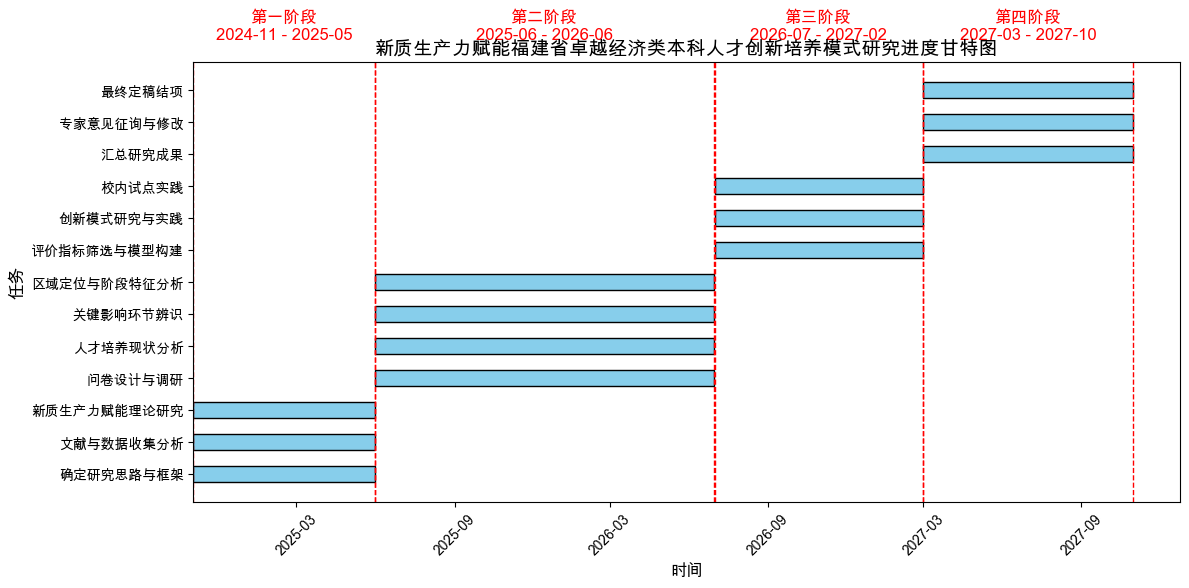

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import calendar  # 用于获取月份的最后一天
import matplotlib.font_manager as fm

# 设置支持中文的字体（适用于 macOS）
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 推荐使用 Arial Unicode MS
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 定义任务和阶段
tasks = [
    {"Task": "确定研究思路与框架", "Start": "2024-11-01", "Finish": "2025-05-31"},
    {"Task": "文献与数据收集分析", "Start": "2024-11-01", "Finish": "2025-05-31"},
    {"Task": "新质生产力赋能理论研究", "Start": "2024-11-01", "Finish": "2025-05-31"},
    {"Task": "问卷设计与调研", "Start": "2025-06-01", "Finish": "2026-06-30"},
    {"Task": "人才培养现状分析", "Start": "2025-06-01", "Finish": "2026-06-30"},
    {"Task": "关键影响环节辨识", "Start": "2025-06-01", "Finish": "2026-06-30"},
    {"Task": "区域定位与阶段特征分析", "Start": "2025-06-01", "Finish": "2026-06-30"},
    {"Task": "评价指标筛选与模型构建", "Start": "2026-07-01", "Finish": "2027-02-28"},
    {"Task": "创新模式研究与实践", "Start": "2026-07-01", "Finish": "2027-02-28"},
    {"Task": "校内试点实践", "Start": "2026-07-01", "Finish": "2027-02-28"},
    {"Task": "汇总研究成果", "Start": "2027-03-01", "Finish": "2027-10-31"},
    {"Task": "专家意见征询与修改", "Start": "2027-03-01", "Finish": "2027-10-31"},
    {"Task": "最终定稿结项", "Start": "2027-03-01", "Finish": "2027-10-31"},
]

# 将日期字符串转换为 datetime 对象
for task in tasks:
    task["Start"] = datetime.strptime(task["Start"], "%Y-%m-%d")
    task["Finish"] = datetime.strptime(task["Finish"], "%Y-%m-%d")

# 创建甘特图
fig, ax = plt.subplots(figsize=(12, 6))  # 调整画布大小

# 设置 Y 轴为任务名称
y_labels = [task["Task"] for task in tasks]
y_pos = range(len(y_labels))

# 绘制每个任务的条形图
for i, task in enumerate(tasks):
    start = task["Start"]
    finish = task["Finish"]
    duration = (finish - start).days  # 任务持续天数
    ax.barh(y_pos[i], duration, left=start, height=0.5, align='center', color='skyblue', edgecolor='black')

# 设置 X 轴为日期格式
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # 显示年月
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation=45)

# 设置 Y 轴标签
ax.set_yticks(y_pos)
ax.set_yticklabels(y_labels)

# 设置标题和标签
plt.title("新质生产力赋能福建省卓越经济类本科人才创新培养模式研究进度甘特图", fontsize=14)
plt.xlabel("时间", fontsize=12)
plt.ylabel("任务", fontsize=12)

# 添加阶段时间点
stages = [
    ("第一阶段", "2024-11", "2025-05"),
    ("第二阶段", "2025-06", "2026-06"),
    ("第三阶段", "2026-07", "2027-02"),
    ("第四阶段", "2027-03", "2027-10"),
]

for stage in stages:
    start_date = datetime.strptime(stage[1], "%Y-%m")
    end_year, end_month = map(int, stage[2].split('-'))
    end_day = calendar.monthrange(end_year, end_month)[1]  # 获取该月的最后一天
    end_date = datetime(end_year, end_month, end_day)  # 月份的最后一天

    mid_date = start_date + (end_date - start_date) / 2  # 计算中点日期

    # 添加垂直线
    ax.axvline(x=start_date, color='red', linestyle='--', linewidth=1)
    ax.axvline(x=end_date, color='red', linestyle='--', linewidth=1)

    # 添加阶段名称和日期注释
    ax.text(mid_date, len(y_labels) + 0.5, f"{stage[0]}\n{stage[1]} - {stage[2]}", 
            ha='center', va='bottom', color='red', fontsize=12, fontweight='bold')

# 调整布局
plt.tight_layout()

# 显示甘特图
plt.show()